# Workshop week 8

## 1. Dimensionality and Complexity Reduction

Dimensionality reduction is a fundamental technique in the field of data analysis and machine learning. It refers to the process of reducing the number of features or variables in a dataset while preserving as much valuable information as possible. This reduction is often necessary for various reasons, such as simplifying complex datasets, speeding up computational tasks, avoiding the curse of dimensionality, and improving the interpretability of data.

#### Here's an introduction to dimensionality reduction and its key concepts:

#### Curse of Dimensionality: 
As the number of features or dimensions in a dataset increases, the volume of the space grows exponentially. This can lead to sparsity in the data, making it challenging to analyze and model effectively.


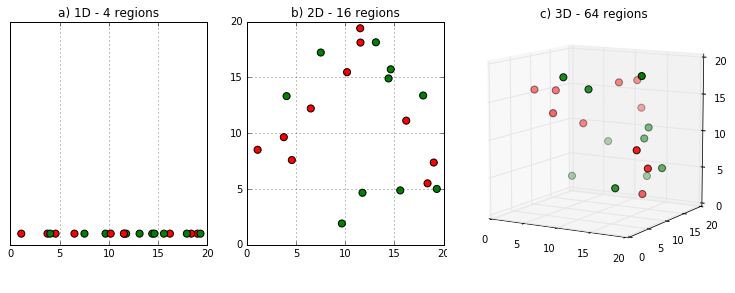



#### Overfitting: 
High-dimensional data is prone to overfitting, where models perform well on the training data but poorly on unseen data due to the excessive complexity.

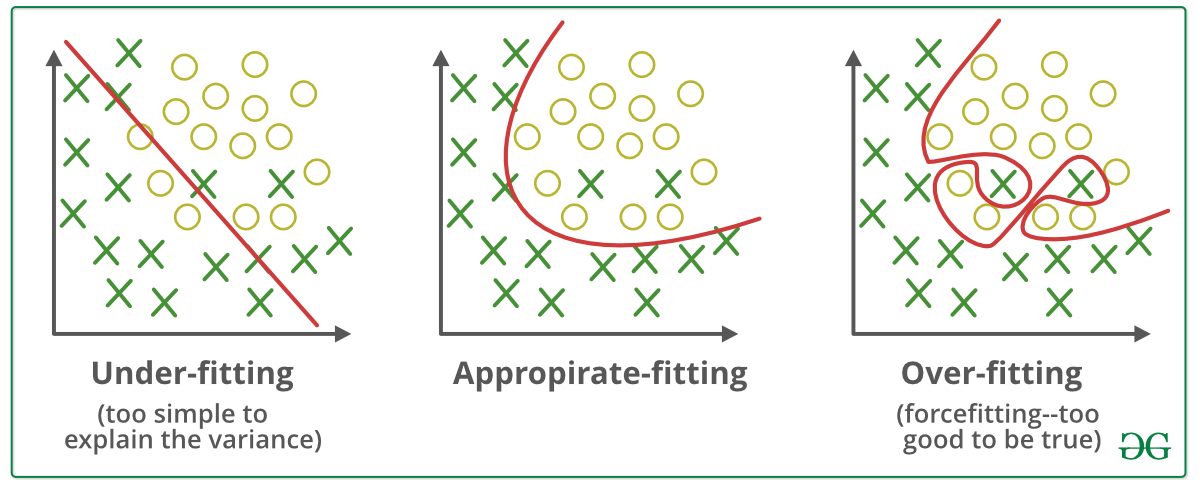



Dimensionality and complexity reduction plays a crucial role in addressing overfitting and underfitting. In cases of overfitting, where models capture noise and fluctuations, reducing dimensionality focuses on essential features and acts as implicit regularization. This prevents the model from fitting noise and enhances generalization. On the other hand, when underfitting occurs due to overly simple models, dimensionality reduction retains critical information and allows for more expressive data representation. It strikes a balance between complexity and simplicity, contributing to computational efficiency and faster training times. In essence, dimensionality reduction is a powerful technique for optimizing model performance and generalization across diverse datasets.





One type of dimensionality reduction is Principal Component Analysis (PCA). 

**Principal Component Analysis (PCA)** is a dimensionality reduction technique widely used in machine learning and statistics. Its primary goal is to transform high-dimensional data into a lower-dimensional representation, capturing the most significant variability in the data. PCA achieves this by identifying orthogonal axes, called principal components, along which the data varies the most. By projecting data points onto these components, PCA enables a more compact representation while retaining essential information. This technique finds applications in various fields, including feature extraction, pattern recognition, and noise reduction.

Your first activity is to apply PCA and interpret the results. 

### Activity 1a: Complete the following code and answer the questions

After completing and running the code, answer the following questions:

1. Explain why the data shape has NOT changed after applying PCA.
2. Given that pca.explained_variance_ are eigen values, calculate explained variance for the first component.

your code to print explained variance
Explained variance ratio: [0.83570438]
Explained variance (eigenvalues): [1.57196027]
Total variance explained: 0.8357043754663639


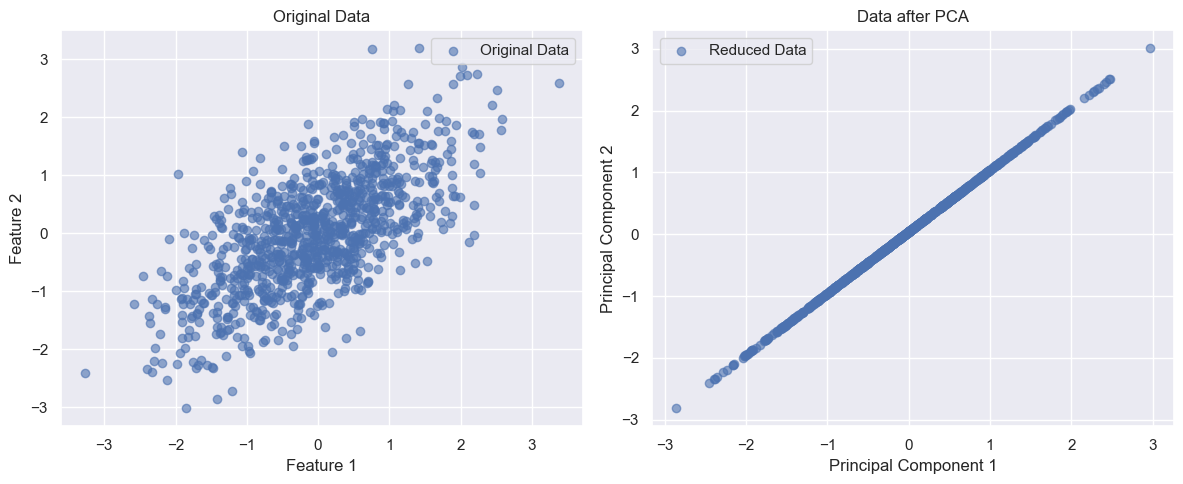

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic data
np.random.seed(42)
mean = [0, 0]
covariance_matrix = np.array([[1, 0.7], [0.7, 1]])
num_samples = 1000

synthetic_data = np.random.multivariate_normal(mean, covariance_matrix, num_samples)


# Apply PCA
num_components = 2

pca = PCA(1)
reduced_data = pca.fit_transform(synthetic_data)
reduced_data_inverse = pca.inverse_transform(reduced_data)

print('your code to print explained variance')

# Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Explained variance (eigenvalues):", pca.explained_variance_)
print("Total variance explained:", np.sum(pca.explained_variance_ratio_))

# Visualize the original and reduced data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], alpha=0.6, label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(reduced_data_inverse[:, 0], reduced_data_inverse[:, 1], alpha=0.6, label='Reduced Data')
plt.title('Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()



### Activity 1b: Experiments with PCA

In this activity, you will modify the code from 1a and answer questions.

1. Change the number of required components to just 1 and rerun the code. Explain the change in the data.
2. From the sklearn PCA documentation, find out how to calculate explained variance ratio for given number of components. Print that ratio and check if your calculation from Q 1a.2 agrees with this value.
3. Change the synthetic_data so that the covariance matrix is [[1, 0], [0 1]]. Explain what does it mean for the data. Rerun the code with this new data and explain how the explained variance changed and why.
4. Change the synthetic_data so that the covariance matrix is [[1, 1], [1 1]]. Explain what does it mean for the data. Rerun the code with this new data and explain how the explained variance changed and why.


### Activity 2: Meaning of PCA components

We talk about PCA components, but are they just mathematical abstracts or do they mean something in practice. Let's find out.

In this activity, you will apply PCA to face images, then visualise PCA components to see that they mean for these images.

Please complete the following code and answer questions.
1. How many PCA components each of these images has in total?
2. What is the explained variance for the top 15 components? (note: explained_variance_ratio_ are normalised eigen values that sum to 1 for all eigenvalues)
3. Observe the images of each of the top 30 components and discuss the differences between them. What do they represent?

your code to print explained variance for 15 components
your code to print total number of components
your code to print explained variance for 15 components
your code to print total number of components


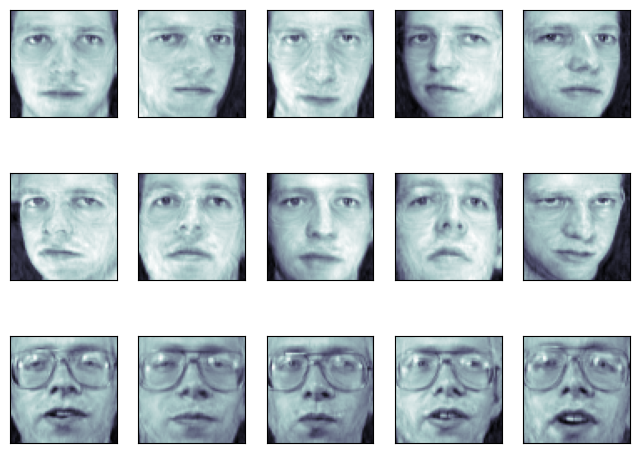

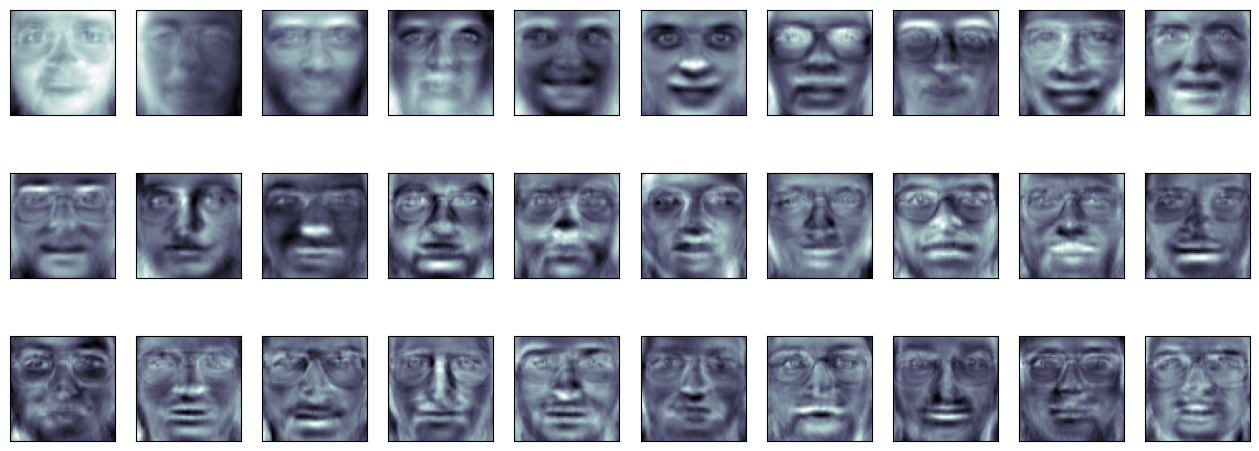

In [7]:
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

faces = datasets.fetch_olivetti_faces()
faces.data.shape

# plot several images
X_train = faces.data

pca = PCA()
reduced_data = pca.fit_transform(X_train)
reduced_data_reverse = pca.inverse_transform(reduced_data)

print('your code to print explained variance for 15 components')
print('your code to print total number of components')

pca = PCA(n_components = 150)
reduced_data = pca.fit_transform(X_train)
reduced_data_inverse = pca.inverse_transform(reduced_data)

print('your code to print explained variance for 15 components')
print('your code to print total number of components')

fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(reduced_data_inverse[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

## 2. Unsupervised Learning


Unsupervised learning is a branch of machine learning that deals with unlabeled data. It seeks to find patterns, clusters, or anomalies in the data without specific guidance. Common applications include customer segmentation, image processing, and anomaly detection. Challenges include the lack of ground truth and selecting the right algorithm. Unsupervised learning is valuable for uncovering hidden insights in data and has diverse applications in various fields.

#### Clustering:
Clustering is a fundamental task in unsupervised learning, where the algorithm groups data points that are similar to each other based on certain features or characteristics. For example, in customer segmentation, clustering algorithms can group customers with similar purchasing behavior, helping businesses tailor marketing strategies to specific customer groups.


#### Anomaly Detection:
Unsupervised learning is crucial for identifying rare and anomalous data points within a dataset. These anomalies might represent fraudulent transactions in finance, defects in manufacturing processes, or security breaches in network traffic analysis.


#### Applications:
Unsupervised learning has a wide range of applications, including:

**Natural Language Processing:**  Clustering documents based on their content, topic modeling, and unsupervised sentiment analysis.

**Image and Video Processing:** Reducing the dimensionality of images for compression, clustering similar images, or separating objects from backgrounds.

**Recommendation Systems:** Recommending products, movies, or content based on user behavior patterns.

**Data Preprocessing:** Reducing the dimensionality and cleaning datasets before applying other machine learning techniques.

#### Challenges:

**Lack of Ground Truth:**
Unsupervised learning lacks labeled data for evaluation, making it challenging to objectively assess algorithm performance.

**Algorithm Selection:**
Choosing the right unsupervised learning algorithm and setting the appropriate hyperparameters can be complex and may require domain expertise.

**Scalability:** Some unsupervised learning algorithms may not scale well to large datasets due to computational complexity.


Unsupervised learning is a versatile and valuable tool for exploring unstructured data, revealing hidden insights, and finding patterns that might be hard to identify through manual analysis. It is increasingly important in data-driven decision-making across various domains.



One popular unsupervised learning algorithm is **K-Means clustering.** It's used for partitioning a dataset into K distinct, non-overlapping subsets (clusters). Here's an example of how to implement K-Means clustering in Python using the KMeans algorithm from the scikit-learn library:

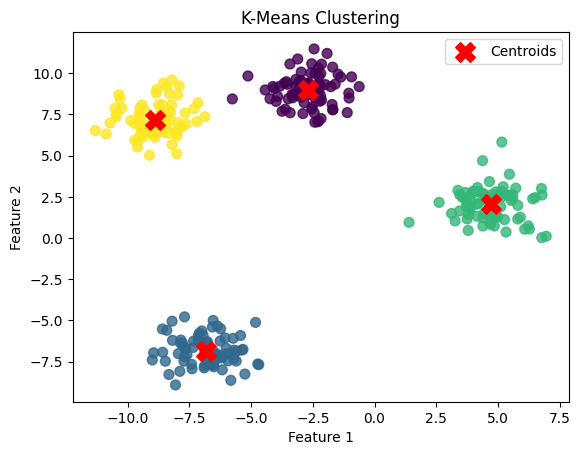

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Activity 3: K-Means implementation

Above we have used the sklearn library to build a KMeans model. Let's build one from scratch. 

Complete and run the code. Test if the code runs properly by observing the 4 clearly separated clusters in different colours.

Work in groups to think together how to complete this task efficiently.

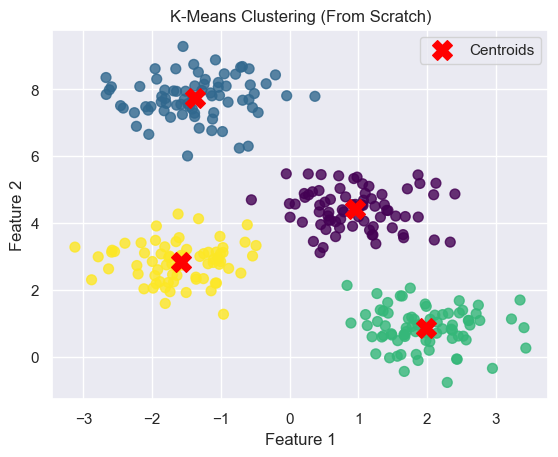

In [9]:
# loop until centresbecome stable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import pairwise_distances_argmin
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center using pairwise_distances_argmin
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (From Scratch)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Answer the following questions about k-Means:

1. What kind of problem would clustering be able to solve? 

2. How are the centroids updated in each iteration, and why is it done this way?

3. Experiment with different values of k (number of clusters) in the kmeans function. How does it affect the clustering results?

### Activity 4a. Comparing different clustering algorithms (optional, if time allows)

**Read, execute the code to see which clustering algorithm performs better on which dataset.**


There many clustering algorithsm we did not cover. The following example aims at showing characteristics of some other clustering algorithms on datasets that are "interesting" but still in 2D. The last dataset is an example of a 'null' situation for clustering: the data is homogeneous, and there is no good clustering.

**DBSCAN** requires two parameters: ε (eps) and the minimum number of points required to form a dense region[a] (minPts). It starts with an arbitrary starting point that has not been visited. This point's ε-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized ε-environment of a different point and hence be made part of a cluster. If a point is found to be a dense part of a cluster, its ε-neighborhood is also part of that cluster. Hence, all points that are found within the ε-neighborhood are added, as is their own ε-neighborhood when they are also dense. This process continues until the density-connected cluster is completely found. Then, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.

**Mini-batch k-Means** is similar to k-Means, where the most computationally costly step is conducted on only a random sample of observations as opposed to all observations. This approach can significantly reduce the time required for the algorithm to find convergence (i.e. fit the data) with only a small cost in quality.

**AffinityPropagation** Does not require to know k number, it can find clusters based on "communication" between data points. All datapoints "communicate" to collectively find who is the best exemplar of the cluster based on some distance measure. Datapoints form a network, where each point is connected to all other points. A good explanation can be found here: https://www.ritchievink.com/blog/2018/05/18/algorithm-breakdown-affinity-propagation/

The **mean shift** algorithm is a nonparametric clustering technique which does not require prior knowledge of the number of clusters, and does not constrain the shape of the clusters. It requires, however, Kernel Density Estimation, which is usually Gaussian distribution. Depending on the distibution parameters (mean, std) the distribution covers more or less points, resulting in more or less number of clusters. More explanation can be found here: https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/


**BIRCH (balanced iterative reducing and clustering using hierarchies)** is an unsupervised data mining algorithm used to perform hierarchical clustering over particularly large data-sets. It is local in that each clustering decision is made without scanning all data points and currently existing clusters. It exploits the observation that data space is not usually uniformly occupied and not every data point is equally important. It makes full use of available memory to derive the finest possible sub-clusters while minimizing I/O costs. It is also an incremental method that does not require the whole data set in advance.

**Gaussian Mixture** (GMMs) are often used for data clustering. You can use GMMs to perform either hard clustering or soft clustering on query data. 

To perform hard clustering, the GMM assigns query data points to the multivariate normal components that maximize the component posterior probability, given the data. That is, given a fitted GMM, cluster assigns query data to the component yielding the highest posterior probability. Hard clustering assigns a data point to exactly one cluster. For an example showing how to fit a GMM to data, cluster using the fitted model, and estimate component posterior probabilities. 

Additionally, you can use a GMM to perform a more flexible clustering on data, referred to as soft (or fuzzy) clustering. Soft clustering methods assign a score to a data point for each cluster. The value of the score indicates the association strength of the data point to the cluster. As opposed to hard clustering methods, soft clustering methods are flexible because they can assign a data point to more than one cluster. When you perform GMM clustering, the score is the posterior probability
While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

The results could be improved by tweaking the parameters for each clustering strategy, for instance, setting the number of clusters for the methods that need this parameter specified. Note that affinity propagation has a tendency to create many clusters. Thus in this example its two parameters (damping and per-point preference) were set to mitigate this behavior.

Run the code, inspect the visualizations, and read up a bit on the algorithms to try and understand
what is going on!

**Which algorithm performs the best clustering for this data?**


Note: all executions are function-scoped as we do not assume the code below executes in an isolated kernel environment.



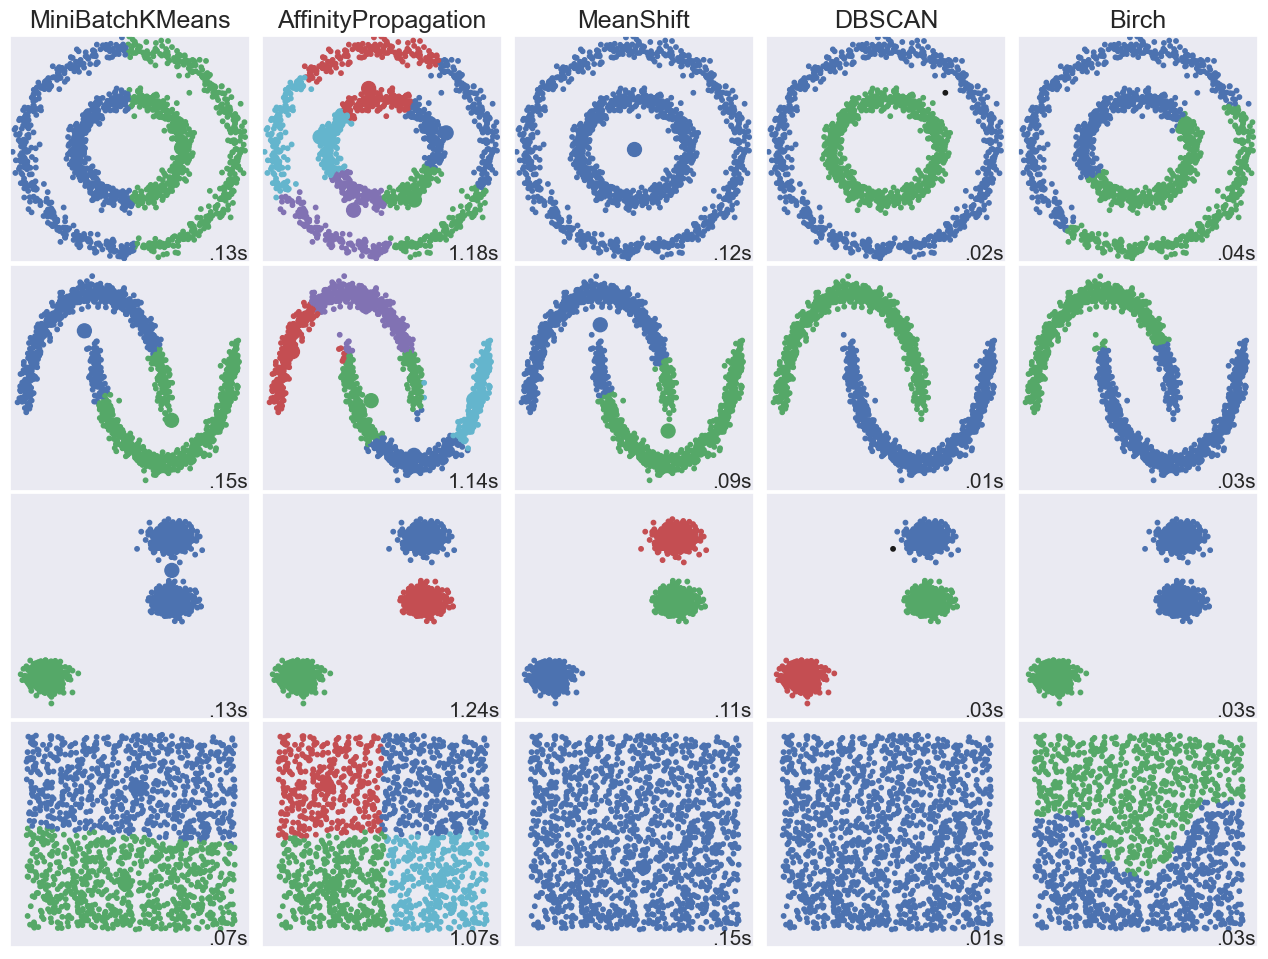

In [11]:
print(__doc__)

%matplotlib inline

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


np.random.seed(0)

# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'DBSCAN', 'Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

datasets = [noisy_circles, noisy_moons, blobs, no_structure]
for i_dataset, dataset in enumerate(datasets):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    
    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                           connectivity=connectivity)
    
    dbscan = cluster.DBSCAN(eps=.2)
    
    affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                       preference=-200)

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", metric="cityblock", n_clusters=2,
        connectivity=connectivity)

    birch = cluster.Birch(n_clusters=2)
    
    gm = GaussianMixture(n_components=2, random_state=0)
    
    clustering_algorithms = [
        two_means, affinity_propagation, ms,
        dbscan, birch]

    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        # plot
        plt.subplot(4, len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

        if hasattr(algorithm, 'cluster_centers_'):
            centers = algorithm.cluster_centers_
            center_colors = colors[:len(centers)]
            plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

### Activity 4b: Add GMM (Gaussian Mixture Model) to above evaluation code (optional, if time allows)

Given that GMM has a few nice properties, it may be interesting to find out how it performs comparing to other models evaluated in the above code. Please figure out how to add GMM to the list and to display and compare the result.

Discuss how GMM compares with other models.